In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('../artifacts/data/MejoresLibros.csv')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   99 non-null     int64  
 1   Titulo       99 non-null     object 
 2   Autor        99 non-null     object 
 3   NotaMedia    99 non-null     object 
 4   Rango        99 non-null     object 
 5   NumVotos     99 non-null     float64
 6   NumCriticas  99 non-null     int64  
 7   Genero       99 non-null     object 
 8   Editorial    99 non-null     object 
 9   AñoEdicion   99 non-null     object 
 10  Resumen      99 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.6+ KB


In [82]:
df.head()

,Unnamed: 0,Titulo,Autor,NotaMedia,Rango,NumVotos,NumCriticas,Genero,Editorial,AñoEdicion,Resumen
0,0,LAS LEGIONES MALDITAS,"POSTEGUILLO, SANTIAGO","8,64",Muy bueno,1.284,176,Histórica y aventuras,EDICIONES B,2008,La historia de las legiones que desafiaron a A...
1,1,TORMENTA DE ESPADAS. (CANCIÓN DE HIELO Y FUEGO 3),"MARTIN, GEORGE R.R.","8,58",Muy bueno,2.440,121,"Fantástica, ciencia ficción",GIGAMESH,2006,"Las huestes de los fugaces reyes de Poniente, ..."
2,2,JUEGO DE TRONOS. (CANCIÓN DE HIELO Y FUEGO 1),"MARTIN, GEORGE R.R.","8,47",Muy bueno,3.286,228,"Fantástica, ciencia ficción",GIGAMESH,2011,"Tras el largo verano, el invierno se acerca a ..."
3,3,AFRICANUS. El hijo del cónsul,"POSTEGUILLO, SANTIAGO","8,47",Muy bueno,1.414,196,Histórica y aventuras,EDICIONES B,2008,"A finales del siglo III a. C., Roma se encontr..."
4,4,LOS MISERABLES,VÍCTOR HUGO,"8,46",Muy bueno,1.522,182,Clásicos de la literatura,AUSTRAL,2012,"«Novela, por supuesto, pero también es Histori..."


## Data clean and EDA

In [83]:
df.drop('Unnamed: 0',inplace=True, axis=1)

In [84]:
df.Rango.value_counts()

Muy bueno    99
Name: Rango, dtype: int64

Como solo hay un rango, se puede eliminar:

In [85]:
df=df.drop('Rango',axis=1)

## Distribución de nota media:

Se convierte la columna NotaMedia a float:

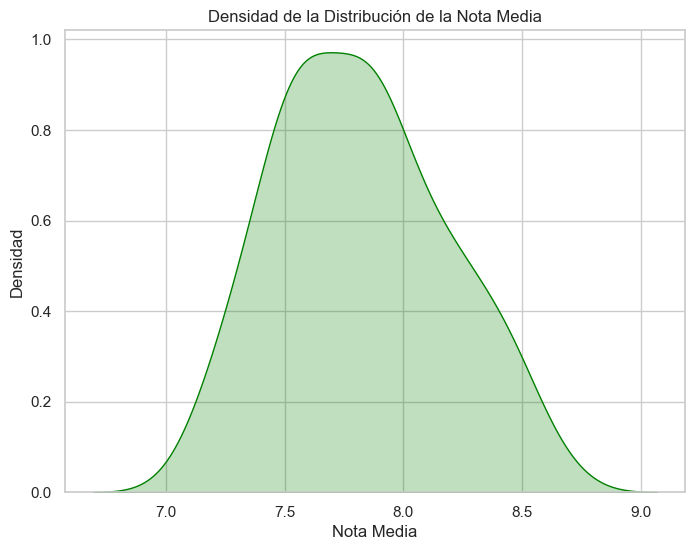

In [86]:
sns.set(style="whitegrid") 
df['NotaMedia'] = df['NotaMedia'].str.replace(',', '.').astype(float)

plt.figure(figsize=(8, 6))
sns.kdeplot(df['NotaMedia'], color='green', shade=True)  
plt.xlabel('Nota Media')
plt.ylabel('Densidad')
plt.title('Densidad de la Distribución de la Nota Media')
plt.show()

El libro con más votos es:

In [87]:
df[df['NumVotos']==df['NumVotos'].max()]

,Titulo,Autor,NotaMedia,NumVotos,NumCriticas,Genero,Editorial,AñoEdicion,Resumen
48,LA SOMBRA DEL VIENTO (El Cementerio de los Lib...,"RUIZ ZAFÓN, CARLOS",7.82,5.494,483,Narrativa,PLANETA,2006,Un amanecer de 1945 un muchacho es conducido p...


## Géneros top lista:

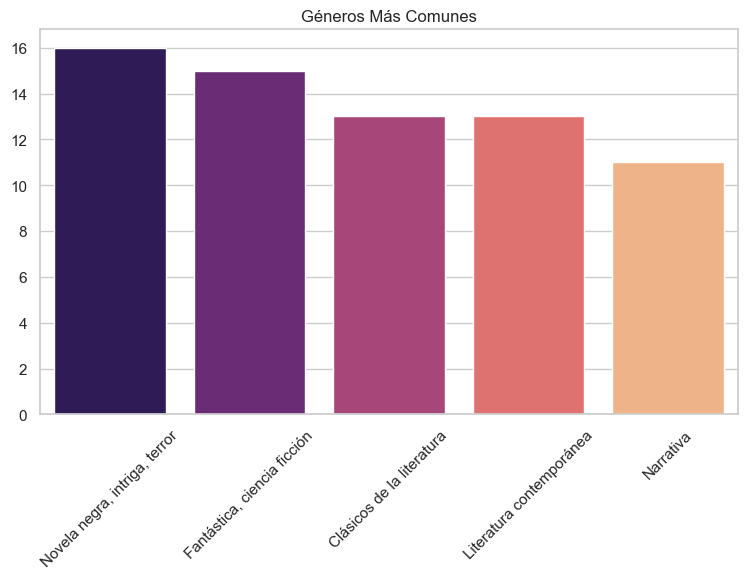

In [88]:
generos = df['Genero'].value_counts().head(5)


plt.figure(figsize=(9, 5))
sns.barplot(x=generos.index,y=generos.values,palette="magma")
plt.title('Géneros Más Comunes')
plt.xticks(rotation=45)
plt.show()

## Editorial con más éxitos:

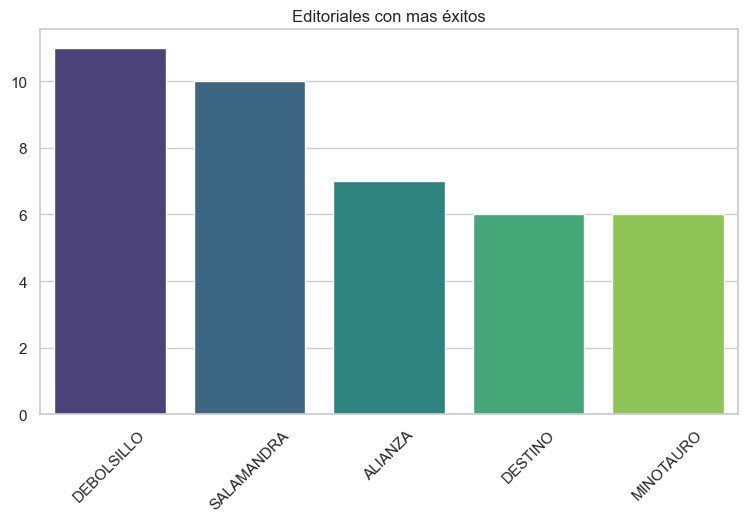

In [89]:
generos = df['Editorial'].value_counts().head(5)


plt.figure(figsize=(9, 5))
sns.barplot(x=generos.index,y=generos.values,palette="viridis")
plt.title('Editoriales con mas éxitos')
plt.xticks(rotation=45)
plt.show()